In [3]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load Titanic dataset directly from GitHub
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [5]:
# Quick look
print("Shape of dataset:", df.shape)   # Rows & columns
print("\nFirst 5 rows:\n", df.head())  # First rows
print("\nInfo:\n")
print(df.info())                       # Data types & missing values
print("\nSummary statistics:\n")
print(df.describe(include="all"))      # Stats for both numeric & categorical


Shape of dataset: (891, 12)

First 5 rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0   

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Count missing values in each column
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
df['Embarked'].value_counts(dropna=False)


Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [10]:
df.fillna({'Embarked': 'S'}, inplace=True)


In [11]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [12]:
df.drop(columns=["Cabin"], inplace=True) 

In [13]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64


In [14]:
df.fillna({'Age': df['Age'].median()}, inplace=True)
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


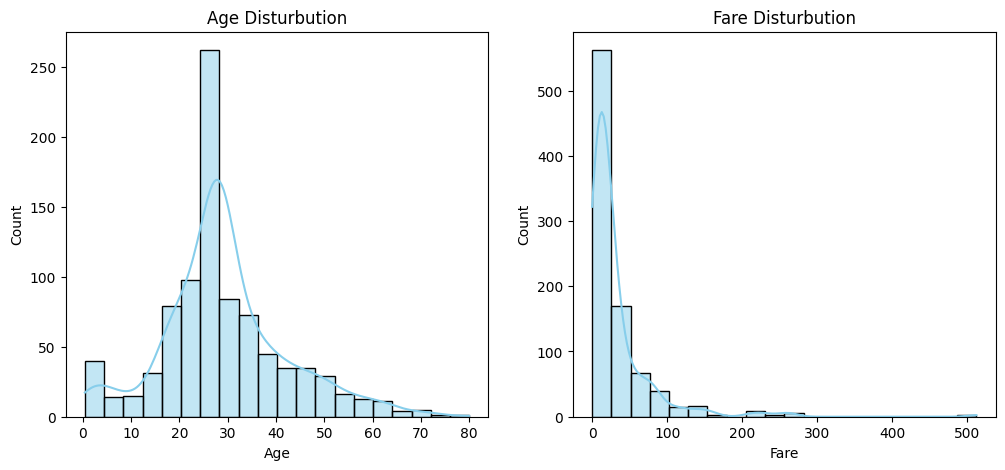

In [19]:
import seaborn as sns
plt.figure(figsize=(12, 5))

#Age Disturbution
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True , color="skyblue")
plt.title("Age Disturbution")

# Fare distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Fare'], bins=20, kde=True , color="skyblue")
plt.title("Fare Disturbution")

plt.show()

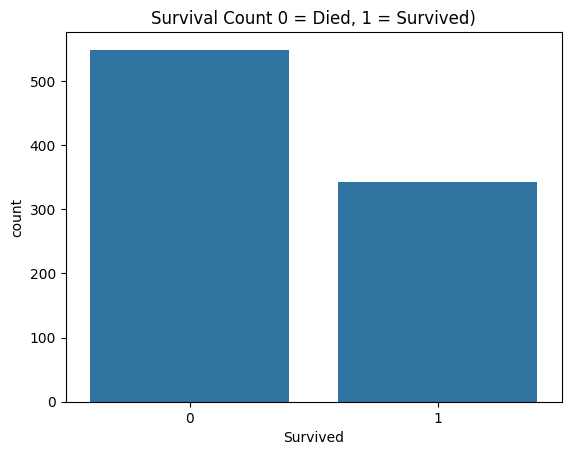

In [22]:
sns.countplot(x='Survived', data=df)
plt.title("Survival Count 0 = Died, 1 = Survived)")
plt.show()

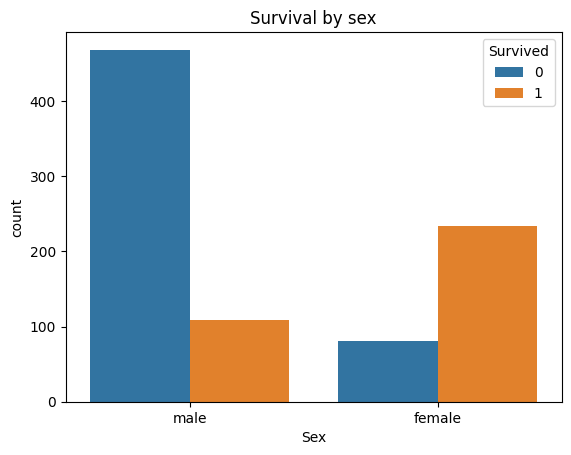

In [23]:
sns.countplot(x='Sex',hue='Survived', data=df)
plt.title("Survival by sex")
plt.show()

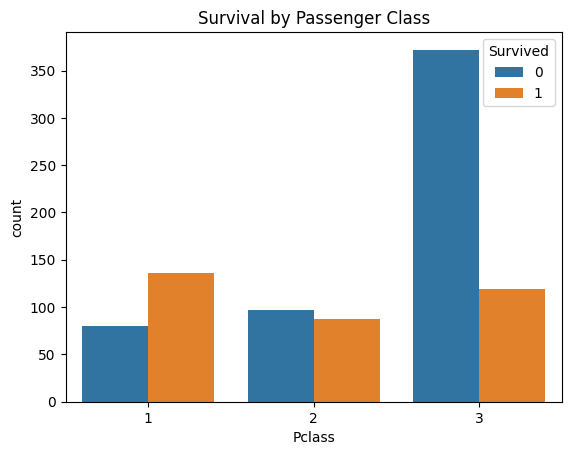

In [25]:
sns.countplot(x='Pclass', hue='Survived',data=df)
plt.title("Survival by Passenger Class")
plt.show()

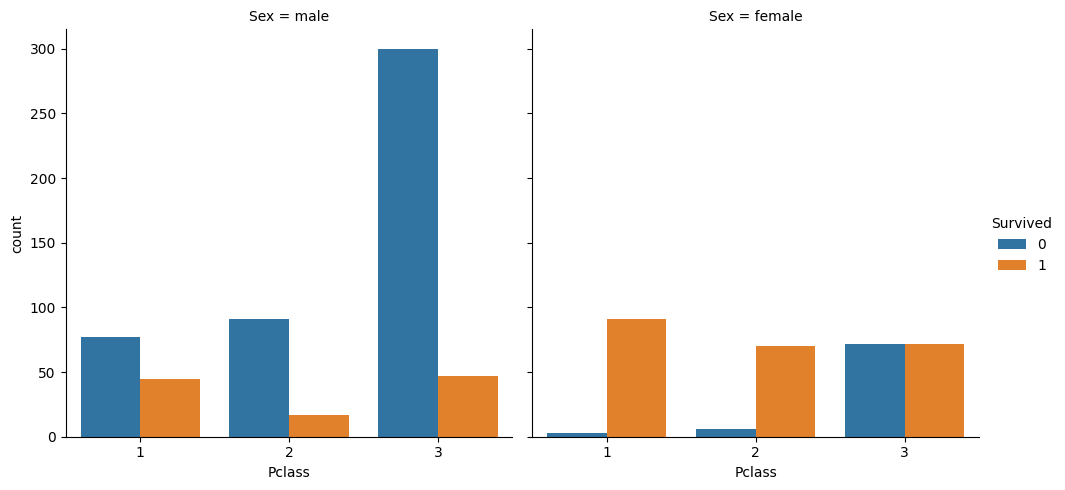

In [26]:
sns.catplot(x="Pclass", hue="Survived", col="Sex", data=df, kind="count")
plt.show()


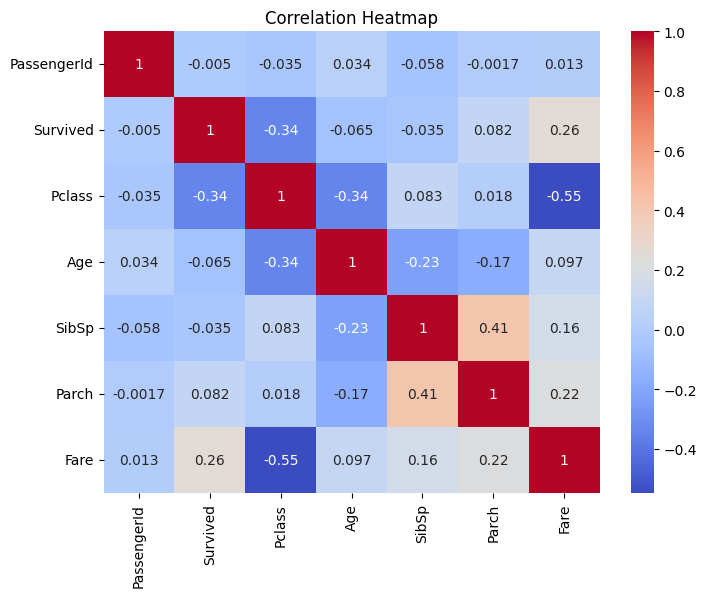

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [28]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


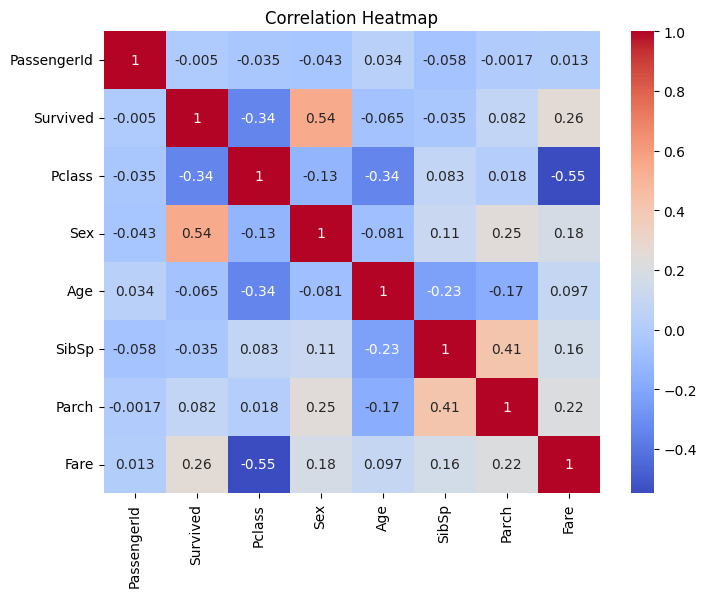

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [30]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [31]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,18,40,60,80], labels=['Child','Teen','Adult','Middle','Senior'])


In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False,Adult
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True,Adult
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True,Adult


In [33]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


In [34]:
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1


In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,AgeGroup,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True,Adult,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False,Adult,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True,Adult,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True,Adult,2,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True,Adult,1,1


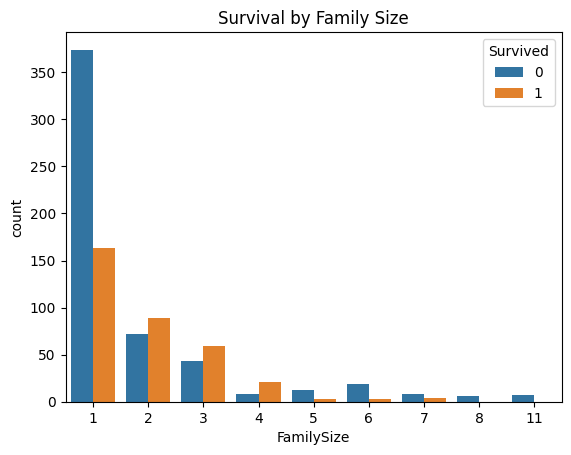

In [36]:
sns.countplot(x='FamilySize', hue='Survived', data=df)
plt.title("Survival by Family Size")
plt.show()

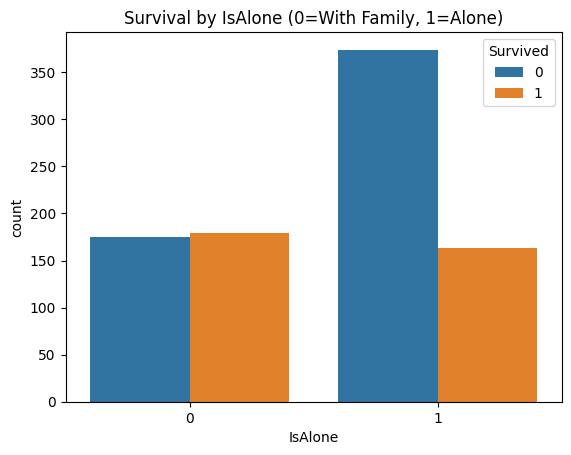

In [37]:
sns.countplot(x="IsAlone", hue="Survived", data=df)
plt.title("Survival by IsAlone (0=With Family, 1=Alone)")
plt.show()


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X=df[['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Embarked_S', 'Embarked_Q']]
y=df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg= LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7988826815642458

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
 [[90 15]
 [21 53]]


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf=RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.8379888268156425

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86       105
           1       0.82      0.78      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179


Confusion Matrix:
 [[92 13]
 [16 58]]


In [42]:
# Extract Title from Name
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.', expand=False).str.strip()
print(df['Title'].value_counts())

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64


In [43]:
title_map = {
    'Mlle':'Miss', 'Ms':'Miss',
    'Mme':'Mrs',
    'Lady':'Royalty', 'the Countess':'Royalty', 'Sir':'Royalty', 'Don':'Royalty', 'Jonkheer':'Royalty',
    'Dr':'Officer', 'Rev':'Officer', 'Col':'Officer', 'Major':'Officer', 'Capt':'Officer'
}
df['Title'] = df['Title'].replace(title_map)
print(df['Title'].value_counts())


Title
Mr         517
Miss       185
Mrs        126
Master      40
Officer     18
Royalty      5
Name: count, dtype: int64


In [44]:
df = pd.get_dummies(df, columns=['Title'], drop_first=True)


In [45]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,AgeGroup,FamilySize,IsAlone,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True,Adult,2,0,False,True,False,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False,Adult,2,0,False,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True,Adult,1,1,True,False,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True,Adult,2,0,False,False,True,False,False
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True,Adult,1,1,False,True,False,False,False


In [48]:
print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked_Q', 'Embarked_S', 'AgeGroup',
       'FamilySize', 'IsAlone', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Officer', 'Title_Royalty'],
      dtype='object')


In [53]:
base_cols = ['Pclass','Sex','Age','Fare','FamilySize','IsAlone']

# هر چه برای Embarked و Title ساخته شده، به‌صورت داینامیک جمع کن
embarked_cols = [c for c in df.columns if c.startswith('Embarked_')]
title_cols    = [c for c in df.columns if c.startswith('Title_')]

# برای مدل‌های خطی بهتره یک دسته مرجع داشته باشیم:
# اگر Title_Mr هست، حذفش کن تا مرجع باشد (اگر نبود، مشکلی نیست)
if 'Title_Mr' in title_cols:
    title_cols.remove('Title_Mr')

X = df[base_cols + embarked_cols + title_cols]
y = df['Survived']

print("Using features:", X.columns.tolist())


Using features: ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mrs', 'Title_Officer', 'Title_Royalty']


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("LogReg Accuracy:", accuracy_score(y_test, y_pred))
print("\nLogReg Report:\n", classification_report(y_test, y_pred))
print("\nLogReg Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


LogReg Accuracy: 0.8044692737430168

LogReg Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179


LogReg Confusion Matrix:
 [[90 15]
 [20 54]]


In [55]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRF Report:\n", classification_report(y_test, y_pred_rf))
print("\nRF Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


RF Accuracy: 0.8212290502793296

RF Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


RF Confusion Matrix:
 [[90 15]
 [17 57]]


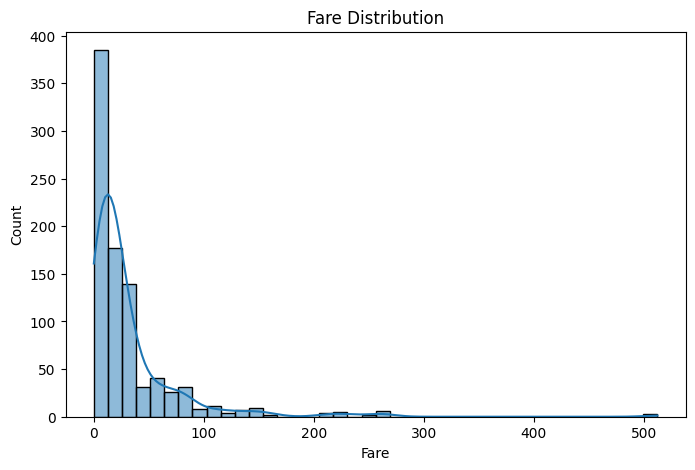

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df['Fare'], bins=40, kde=True)
plt.title("Fare Distribution")
plt.show()


In [57]:
df['FareBand'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very_High'])
print(df[['Fare', 'FareBand']].head(10))


      Fare   FareBand
0   7.2500        Low
1  71.2833  Very_High
2   7.9250     Medium
3  53.1000  Very_High
4   8.0500     Medium
5   8.4583     Medium
6  51.8625  Very_High
7  21.0750       High
8  11.1333     Medium
9  30.0708       High


In [58]:
df = pd.get_dummies(df, columns=['FareBand'], drop_first=True)
print(df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked_Q', 'Embarked_S', 'AgeGroup',
       'FamilySize', 'IsAlone', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Officer', 'Title_Royalty', 'FareBand_Medium', 'FareBand_High',
       'FareBand_Very_High'],
      dtype='object')


In [59]:

X = df[['Pclass','Sex','Age','Fare','FamilySize','IsAlone',
        'Embarked_S','Embarked_Q',
        'Title_Miss','Title_Mrs','Title_Officer','Title_Royalty',
        'FareBand_Medium','FareBand_High','FareBand_Very_High']]
y = df['Survived']


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print("\n--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n--- Random Forest ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


--- Logistic Regression ---
Accuracy: 0.8044692737430168
Confusion Matrix:
 [[91 14]
 [21 53]]

--- Random Forest ---
Accuracy: 0.8324022346368715
Confusion Matrix:
 [[90 15]
 [15 59]]


In [63]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)


y_pred_xgb = xgb.predict(X_test)


print("\n--- XGBoost ---")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))



--- XGBoost ---
Accuracy: 0.8156424581005587
Confusion Matrix:
 [[88 17]
 [16 58]]


In [64]:
results = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred),       # از Logistic
        accuracy_score(y_test, y_pred_rf),    # از Random Forest
        accuracy_score(y_test, y_pred_xgb)    # از XGBoost
    ]
}

import pandas as pd
results_df = pd.DataFrame(results)
print("\n--- Model Comparison ---")
print(results_df)



--- Model Comparison ---
                 Model  Accuracy
0  Logistic Regression  0.804469
1        Random Forest  0.832402
2              XGBoost  0.815642


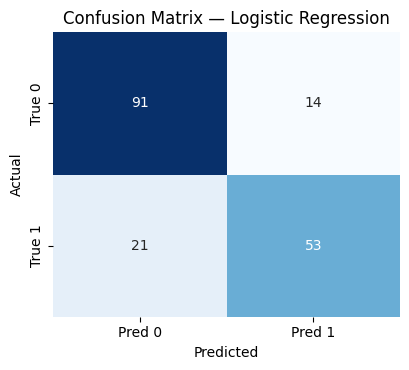

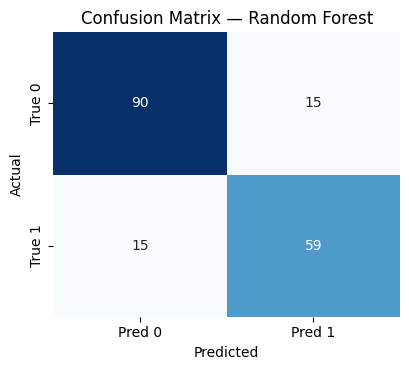

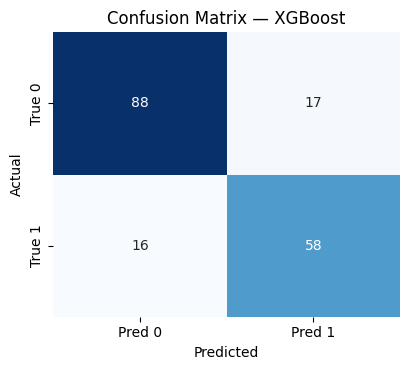

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4.2,3.8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred 0','Pred 1'], yticklabels=['True 0','True 1'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# سه نمودار جدا:
plot_cm(y_test, y_pred,     "Confusion Matrix — Logistic Regression")
plot_cm(y_test, y_pred_rf,  "Confusion Matrix — Random Forest")
plot_cm(y_test, y_pred_xgb, "Confusion Matrix — XGBoost")


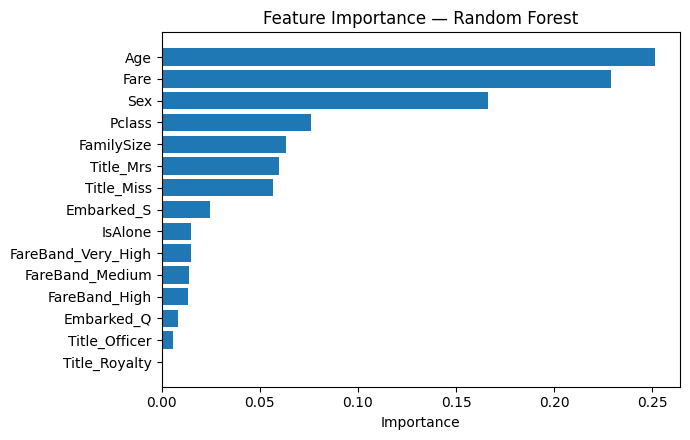

In [66]:
import numpy as np

def plot_feature_importance(model, feature_names, title):
    importances = model.feature_importances_
    idx = np.argsort(importances)[::-1]
    names_sorted = [feature_names[i] for i in idx]
    vals_sorted = importances[idx]

    plt.figure(figsize=(7,4.5))
    plt.barh(names_sorted[::-1], vals_sorted[::-1])
    plt.title(title)
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

# فرض: rf همان RandomForestClassifier آموزش‌داده‌شده است
plot_feature_importance(rf, X.columns.tolist(), "Feature Importance — Random Forest")


<Figure size 700x500 with 0 Axes>

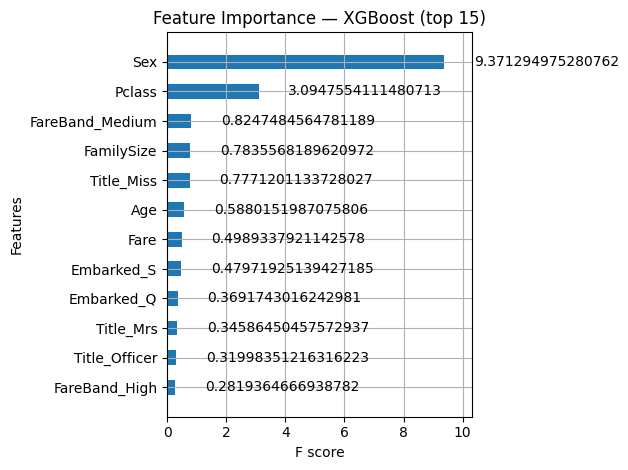

In [67]:

from xgboost import plot_importance

plt.figure(figsize=(7,5))
plot_importance(xgb, height=0.5, max_num_features=15, importance_type='gain')
plt.title("Feature Importance — XGBoost (top 15)")
plt.tight_layout()
plt.show()


In [69]:
import pandas as pd
coefs = pd.Series(logreg.coef_[0], index=X.columns).sort_values(ascending=False)
display(coefs.head(10))     
display(coefs.tail(10))    


Sex                   1.940121
Title_Mrs             1.382077
FareBand_High         0.342756
FareBand_Very_High    0.333561
Title_Royalty         0.281857
Title_Miss            0.276187
FareBand_Medium       0.145387
Title_Officer         0.112161
Embarked_Q            0.111113
Fare                  0.002986
dtype: float64

Title_Miss         0.276187
FareBand_Medium    0.145387
Title_Officer      0.112161
Embarked_Q         0.111113
Fare               0.002986
Age               -0.039411
IsAlone           -0.324086
Embarked_S        -0.368410
FamilySize        -0.377127
Pclass            -0.836830
dtype: float64